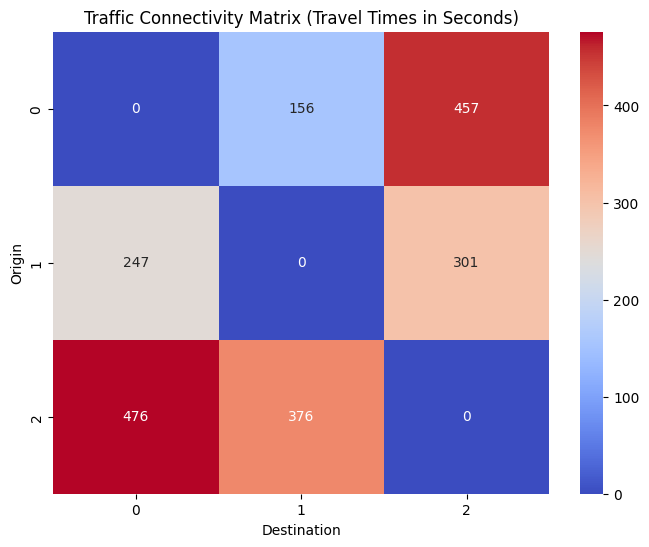

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# 🔹 Load travel times from the saved JSON file
with open("C:/Users/Prerana/Desktop/Traffic_Analysis/data/traffic_matrix.json", "r") as file:
    travel_times = json.load(file)

# 🔹 Find the number of locations dynamically
num_locations = max(max(map(int, key.split("-"))) for key in travel_times.keys()) + 1

# 🛠 Create a square matrix of correct size (num_locations x num_locations)
matrix = np.zeros((num_locations, num_locations))

# 🔄 Fill matrix with travel times
for key, value in travel_times.items():
    i, j = map(int, key.split("-"))
    matrix[i, j] = value

# 🎨 Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".0f", xticklabels=range(num_locations), yticklabels=range(num_locations))
plt.xlabel("Destination")
plt.ylabel("Origin")
plt.title("Traffic Connectivity Matrix (Travel Times in Seconds)")
plt.show()


In [8]:
!pip install munkres



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import json
from munkres import Munkres

# Load the traffic matrix
with open("C:/Users/Prerana/Desktop/Traffic_Analysis/data/traffic_matrix.json", "r") as file:
    traffic_matrix = json.load(file)

# Check if data is loaded correctly
print("Traffic Matrix:", traffic_matrix)


Traffic Matrix: {'0-1': 156, '0-2': 457, '1-0': 247, '1-2': 301, '2-0': 476, '2-1': 376}


In [11]:
# Convert dictionary to a cost matrix
cost_matrix = []
keys = list(traffic_matrix.keys())
num_locations = int(len(keys) ** 0.5)  # Square root of the matrix size

for i in range(num_locations):
    row = []
    for j in range(num_locations):
        if i == j:
            row.append(float('inf'))  # Avoid self-travel
        else:
            row.append(traffic_matrix[f"{i}-{j}"])
    cost_matrix.append(row)

# Print the cost matrix
import numpy as np
print("Cost Matrix:\n", np.array(cost_matrix))


Cost Matrix:
 [[ inf 156.]
 [247.  inf]]


In [13]:
# Create src directory if it doesn't exist
import os
os.makedirs("src", exist_ok=True)

# Create driver_allocation.py file
file_path = "src/driver_allocation.py"
if not os.path.exists(file_path):
    with open(file_path, "w") as f:
        f.write("# This is driver_allocation.py\n")
    print(f"✅ Created {file_path}")
else:
    print(f"✅ {file_path} already exists")


✅ Created src/driver_allocation.py


In [14]:
!pip install munkres



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import os
print(os.listdir("src"))


['driver_allocation.py']


In [20]:
print(os.listdir("data"))


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data'